# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [40]:
## IMPORT YOUR LIBS HERE
# from lecture
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for helping us with text
import string
# Regular Expression Library
import re

In [41]:
import nltk 
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\po530\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\po530\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\po530\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
# stopwords = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [43]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')

# 2. Print the shape
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [44]:
# 3. Inspect / remove nulls and duplicates
print(df.duplicated().sum())
print(df.isnull().sum())

0
id                0
message           0
topic             0
topic_category    0
dtype: int64


In [45]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

topic_category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [46]:
# 1. Make a function that makes all text lowercase.
def make_lower(target):
    return target.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
make_lower(test_string)

'this is a sentence with lots of caps.'

In [47]:
# 2. Make a function that removes all punctuation. 
def remove_punc(target):    
    return re.sub(r'[^\w\s]','',target)

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punc(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [48]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string


test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [56]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\po530\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\po530\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\po530\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [55]:
a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
def stem_word(a_sentence):
    tokens = word_tokenize(a_sentence)
    pos_tokens = nltk.pos_tag(tokens)
    chunked = nltk.chunk.ne_chunk(pos_tokens)
    return chunked
print(stem_word(a_sentence))

(S
  This/DT
  is/VBZ
  a/DT
  sentence/NN
  !/.
  With/IN
  some/DT
  different/JJ
  stopwords/NNS
  i/NNS
  have/VBP
  added/VBN
  in/IN
  here/RB
  ./.)


In [66]:
# From lecture
def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [62]:
from nltk.stem import WordNetLemmatizer
def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(a_string)
    tagged_words = nltk.pos_tag(words)
    

    valid_words = []
    for word in tagged_words:
        # The word is the first element in the tuple
        the_word = word[0]
        the_pos_tag = word[1]
        the_pos_tag = convert_pos(the_pos_tag)
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        valid_words.append(lemmed_word)
    a_string = ' '.join(valid_words)
    return a_string 
print(test_string)
lem_with_pos_tag(test_string)

I played and started playing with players and we all love to play with plays


'I play and start play with player and we all love to play with play'

In [65]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punc(input_string)
    input_string = remove_stopwords(input_string)
    input_string = lem_with_pos_tag(input_string)   
    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'
print('Original: ', test_string)
print('Processed: ', text_pipeline(test_string))

Original:  I played and started playing with players and we all love to play with plays
Processed:  play start play player love play play


In [70]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [73]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [74]:
# 0. Define your `X` and `y` data. 
X = df['message_clean']
y = df['topic_category']

In [75]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [76]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [77]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)

TfidfVectorizer()

In [78]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [79]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X_train.shape, type(X_train))

(9051, 114397) <class 'scipy.sparse._csr.csr_matrix'>


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [80]:
# 1. Initalize an empty model. 
model = MultinomialNB()

In [81]:
# Fit our model with our training data.
model.fit(X_train, y_train)

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [82]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [83]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.870968


C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

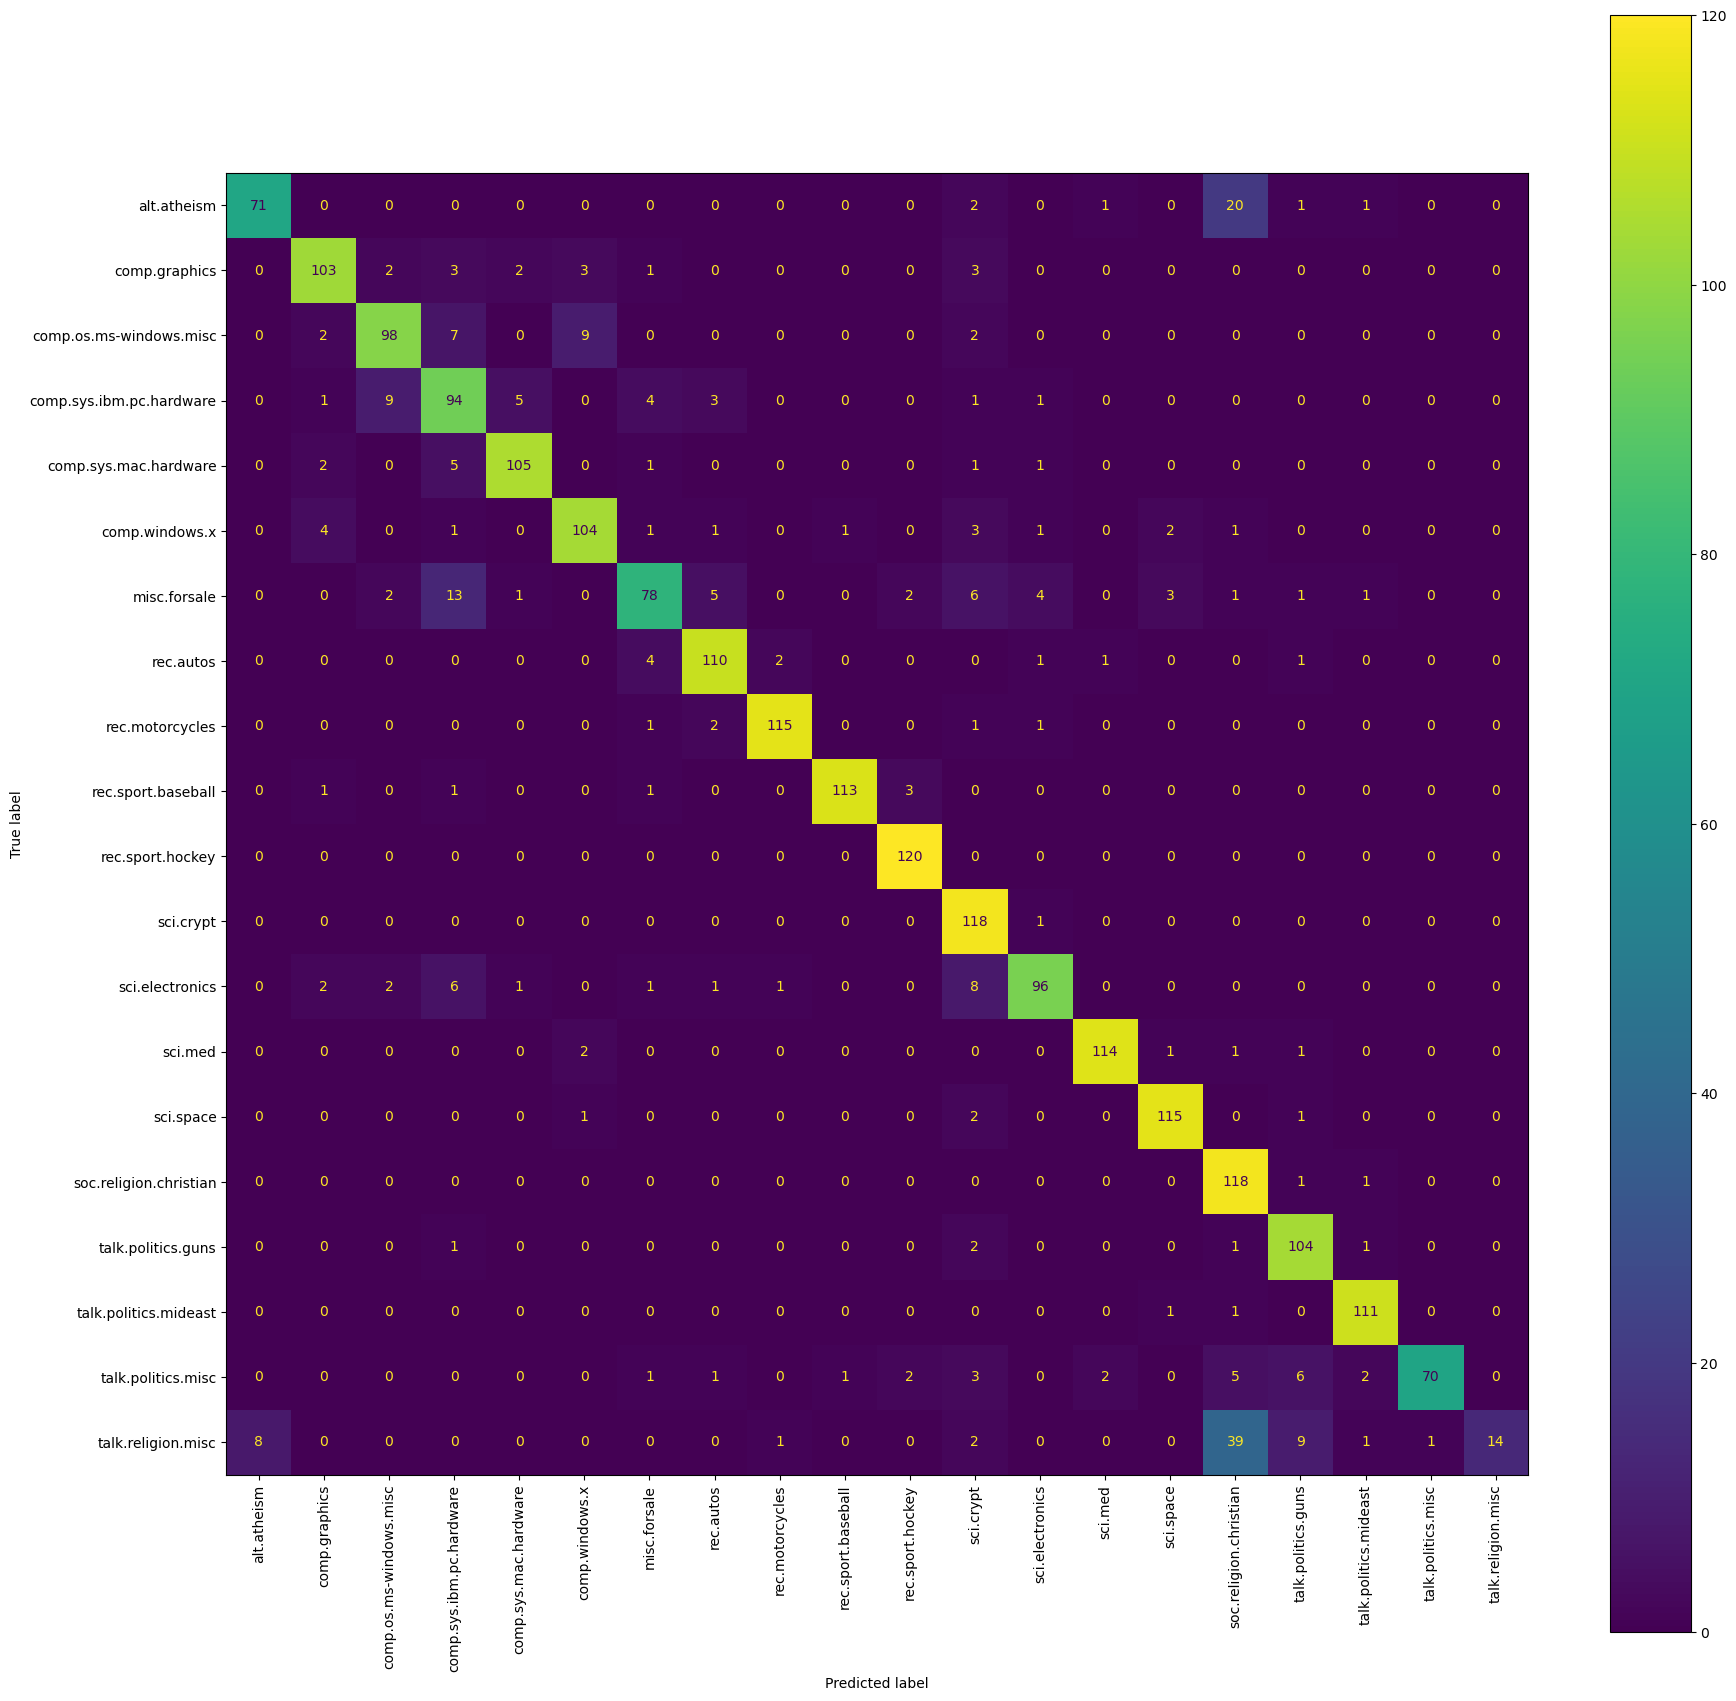

In [84]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [85]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.90      0.74      0.81        96
           comp.graphics       0.90      0.88      0.89       117
 comp.os.ms-windows.misc       0.87      0.83      0.85       118
comp.sys.ibm.pc.hardware       0.72      0.80      0.76       118
   comp.sys.mac.hardware       0.92      0.91      0.92       115
          comp.windows.x       0.87      0.87      0.87       119
            misc.forsale       0.84      0.67      0.74       117
               rec.autos       0.89      0.92      0.91       119
         rec.motorcycles       0.97      0.96      0.96       120
      rec.sport.baseball       0.98      0.95      0.97       119
        rec.sport.hockey       0.94      1.00      0.97       120
               sci.crypt       0.77      0.99      0.86       119
         sci.electronics       0.91      0.81      0.86       118
                 sci.med       0.97      0.96      0.96       119
         

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [96]:
my_sentence = 'We believe in the importance of safeguarding our Second Amendment ensuring responsible gun ownership. '

# 1. Apply the text pipeline to your sentence
processed_mys = text_pipeline(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([processed_mys])

# 3. Use the model to predict your new `X`. 
mys_pred = model.predict(X)

# 4. Print the prediction
mys_pred

# talk.politics.guns...

array(['talk.politics.guns'], dtype='<U24')

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [108]:
# 1. Load the dem-vs-rep-tweets.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [109]:
# 3. Inspect / remove nulls and duplicates
print(df.duplicated().sum())
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
df.shape

57
Party     0
Handle    0
Tweet     0
dtype: int64


(86403, 3)

In [110]:
# 4. Find class balances, print out how many of each topic_category there are.
# Balanced dataset
df.Party.value_counts()

Party
Republican    44362
Democrat      42041
Name: count, dtype: int64

In [111]:
# 5. Apply the text pipeline to your text data column. 
# should have made all column name lowercase
df['tweet_clean'] = df['Tweet'].apply(text_pipeline)

#### Text vecotrization

In [112]:
# 0. Define your `X` and `y` data. 
X = df['tweet_clean']
y = df['Party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(df.shape, len(X_train_text))

(86403, 4) 9051


C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [113]:
# 1. Initialize our vectorizer
vectorizer = TfidfVectorizer()

# 2. Makes vocab matrix
vectorizer.fit(X_train)

# 3. This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

#### MultinomialNB

In [115]:
# Fit our model with our training data.
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MultinomialNB()

In [117]:
y_pred = model_mnb.predict(X_test)
y_pred_proba = model_mnb.predict_proba(X_test)

In [119]:
# 2. Print the accuracy of the model. 
accuracy = model_mnb.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.807650


C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

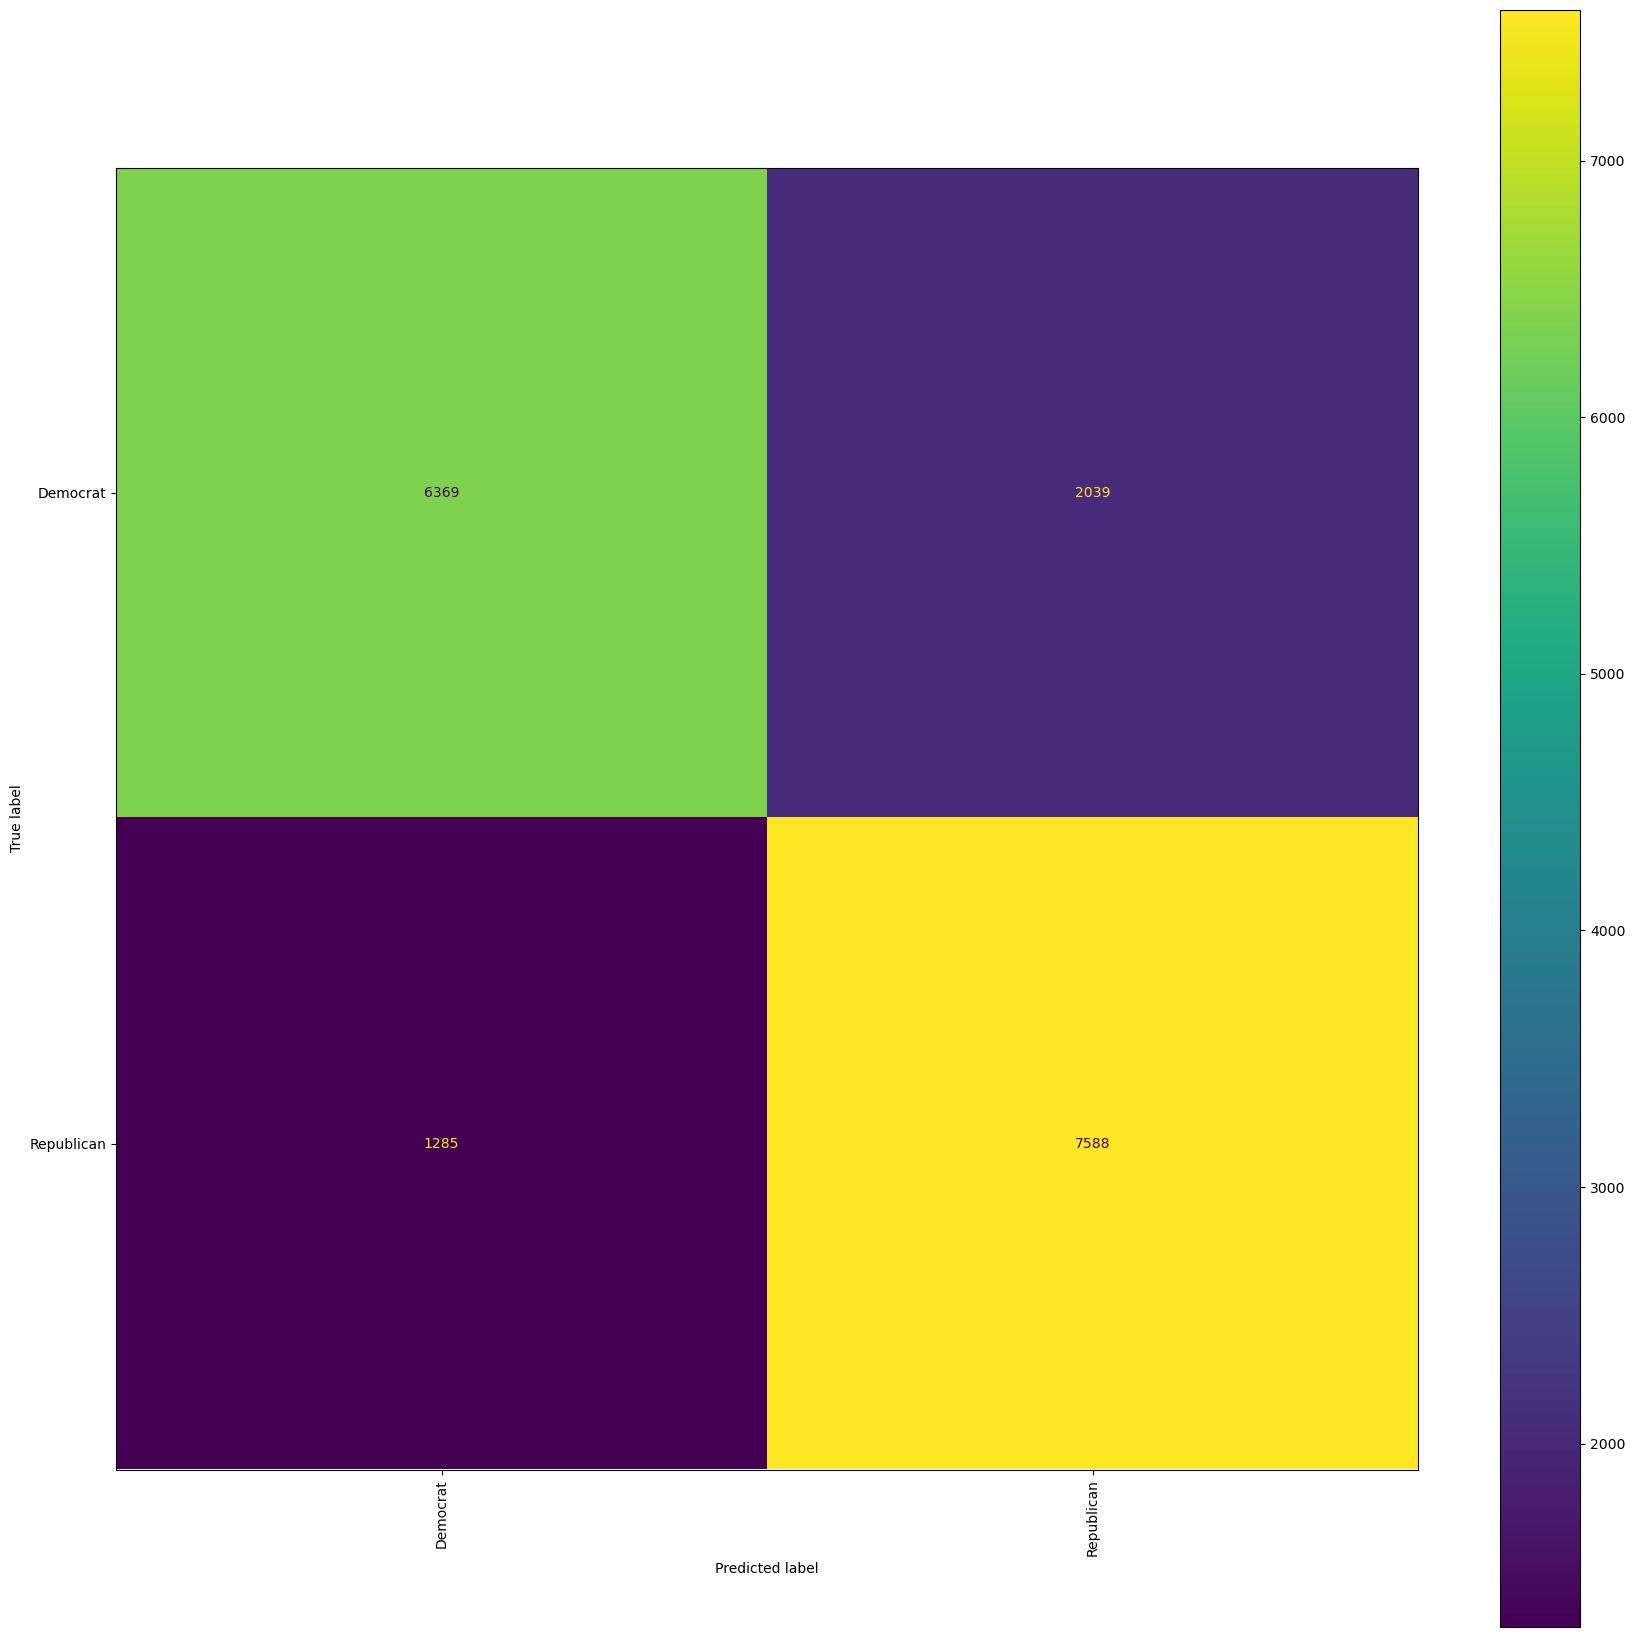

In [121]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model_mnb, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

#### Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

# 1. Fit our model with our training data.
rf_model = RandomForestClassifier(20)
rf_model.fit(X_train, y_train)

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(n_estimators=20)

In [124]:
# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

In [125]:
# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)
print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Model Accuracy: 0.734911
              precision    recall  f1-score   support

    Democrat       0.73      0.71      0.72      8408
  Republican       0.74      0.76      0.75      8873

    accuracy                           0.73     17281
   macro avg       0.73      0.73      0.73     17281
weighted avg       0.73      0.73      0.73     17281



C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

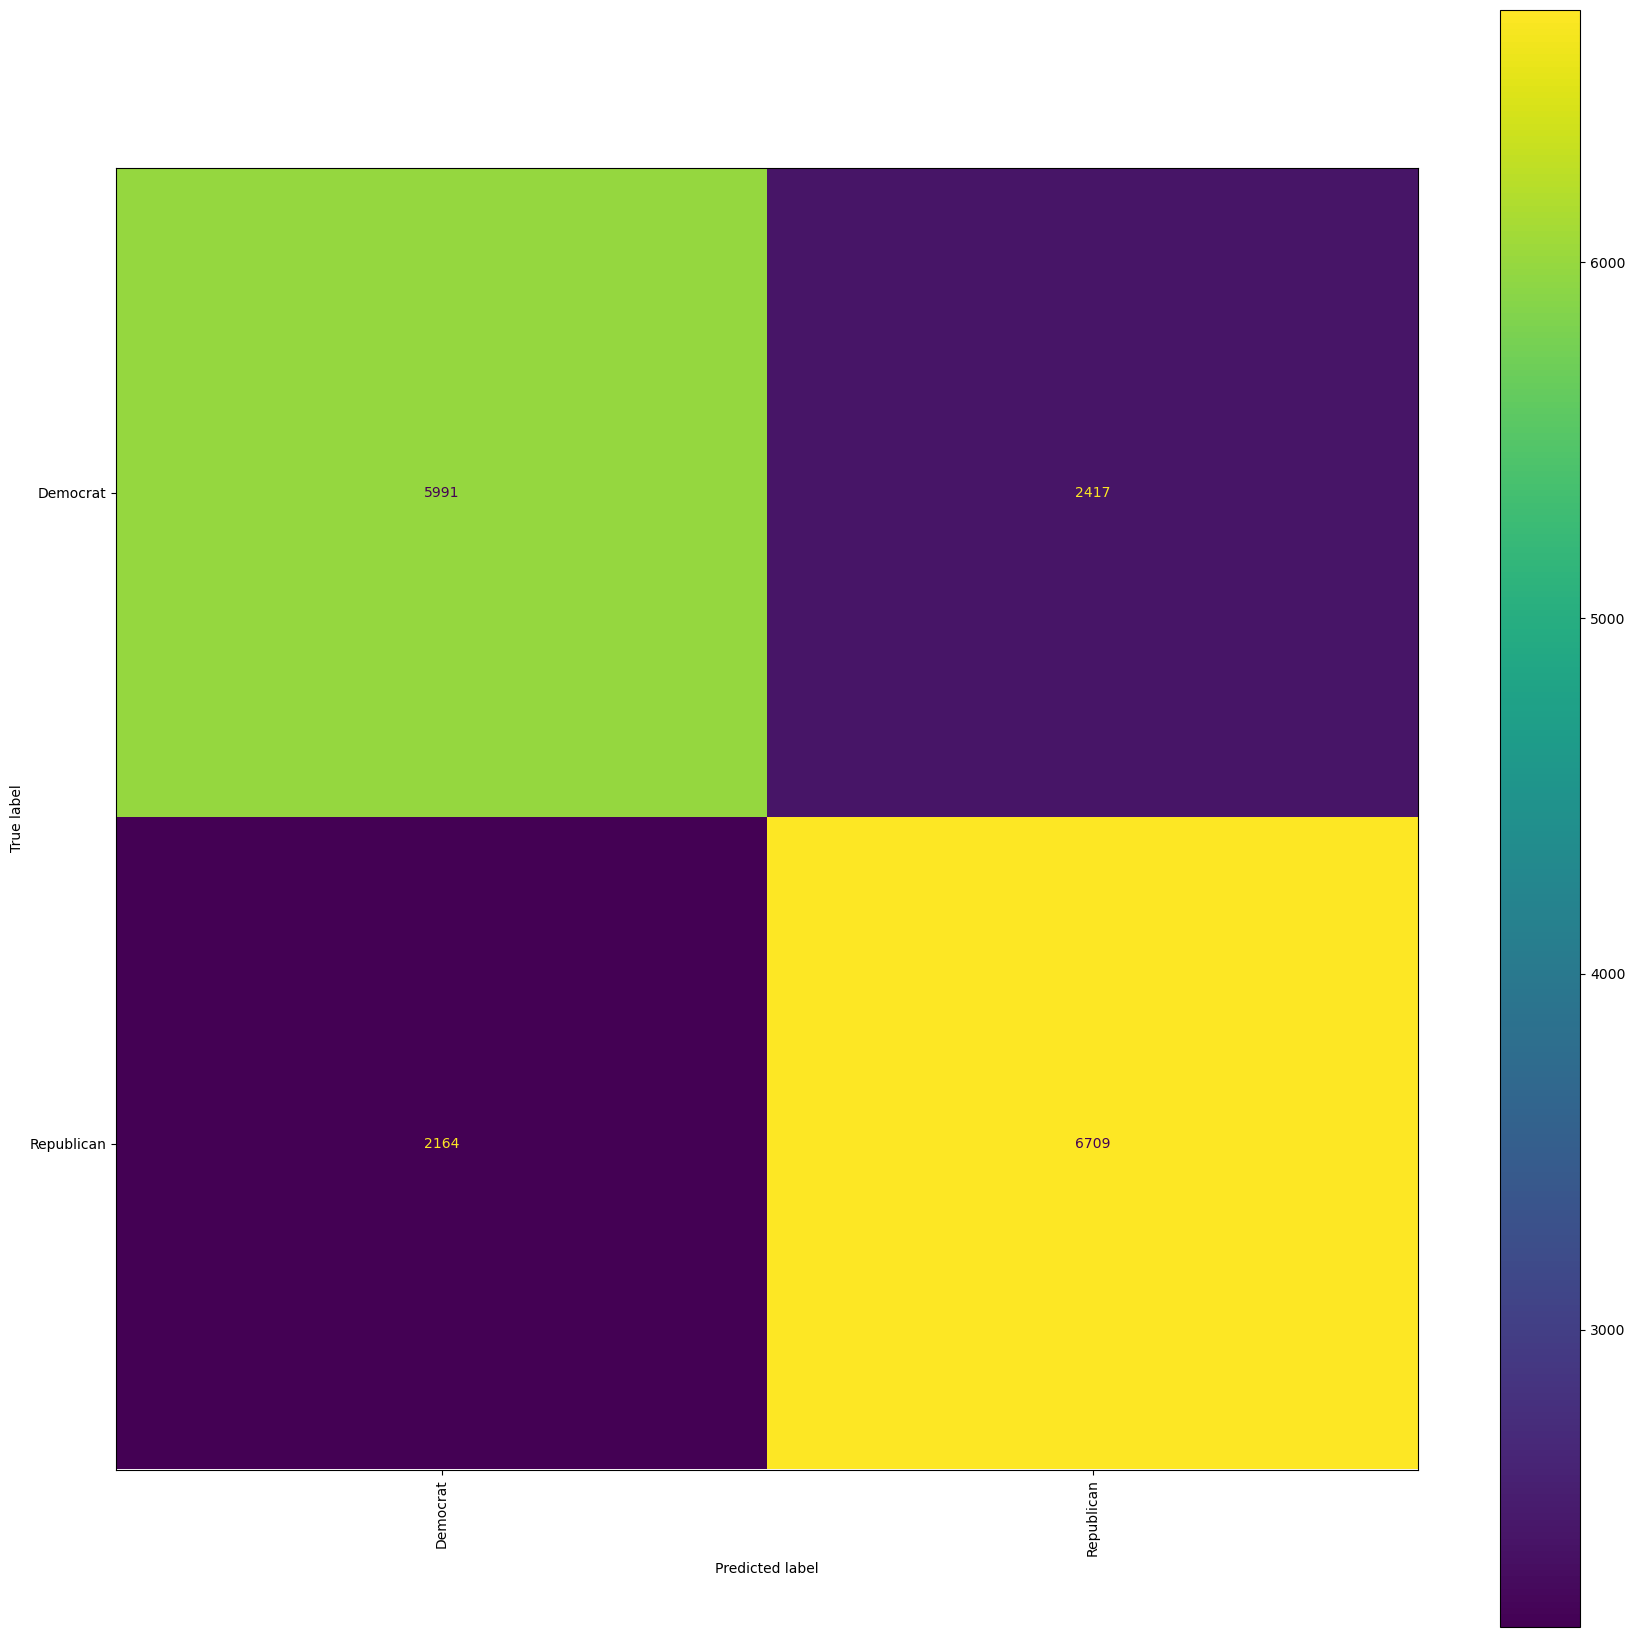

In [126]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);


In [127]:
# In this case MultinomialNB performs better than Random Forest. 